In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.DataFrame(pd.read_csv(mouse_drug_data_to_load))

clinical_df = pd.DataFrame(pd.read_csv(clinical_trial_data_to_load))

# Combine the data into a single dataset
main_df = mouse_df.merge(clinical_df, on='Mouse ID', how='left')

# Display the data table for preview
main_df.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
response_gb = main_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
response_mean_df = pd.DataFrame(response_gb['Tumor Volume (mm3)'].mean())
#Renaming the column to specify that this is the mean
response_mean_df = response_mean_df.rename(columns={'Tumor Volume (mm3)' : 'Mean Tumor Volume (mm3)'})
# Preview DataFrame
response_mean_df.head()

Mean Tumor Volume (mm3)
Drug      Timepoint                         
Capomulin 0                        45.000000
          5                        44.266086
          10                       43.084291
          15                       42.064317
          20                       40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame
response_sem_df = pd.DataFrame(response_gb['Tumor Volume (mm3)'].sem()) #adds SEM calculation to dataframe
#Renaming the column to specify that this is the standard error
response_sem_df = response_sem_df.rename(columns={'Tumor Volume (mm3)' : 'Standard Error for Tumor Volume (mm3)'})
# Preview DataFrame
response_sem_df.head()


Standard Error for Tumor Volume (mm3)
Drug      Timepoint                                       
Capomulin 0                                       0.000000
          5                                       0.448593
          10                                      0.702684
          15                                      0.838617
          20                                      0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames

response_mean_df = response_mean_df.unstack(level='Drug') #found this 'unstack' function for moving 'indexes' from row to column - stack goes from column to row
# Preview that Reformatting worked
response_mean_df.head()


Mean Tumor Volume (mm3)                                              \
Drug                    Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                       
0                       45.000000  45.000000  45.000000  45.000000  45.000000   
5                       44.266086  46.503051  47.062001  47.389175  46.796098   
10                      43.084291  48.285125  49.403909  49.582269  48.694210   
15                      42.064317  50.094055  51.296397  52.399974  50.933018   
20                      40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [5]:
#same unstack code as used on the mean dataframe
response_sem_df = response_sem_df.unstack(level='Drug') 
response_sem_df.head()

Standard Error for Tumor Volume (mm3)                                \
Drug                                  Capomulin  Ceftamin Infubinol  Ketapril   
Timepoint                                                                       
0                                      0.000000  0.000000  0.000000  0.000000   
5                                      0.448593  0.164505  0.235102  0.264819   
10                                     0.702684  0.236144  0.282346  0.357421   
15                                     0.838617  0.332053  0.357705  0.580268   
20                                     0.909731  0.359482  0.476210  0.726484   

                                                                       
Drug       Naftisol   Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                              
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.202385  0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.319415  0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.444378  0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.595260  0.839609  0.555181  0.786199  0.621889  0.533182

In [6]:
resp_mean_flat_df = response_mean_df
resp_mean_flat_df.columns = response_mean_df.columns.get_level_values(1)
#Because of the way Groupby and Unstack go, it's kind of a pain to access results by drug, the above lines make a new dataframe that flattens the columns so we can access results by drug
resp_error_flat_df = response_sem_df
resp_error_flat_df.columns = response_sem_df.columns.get_level_values(1)

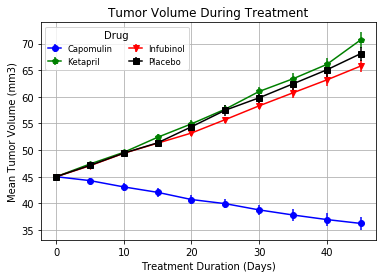

<Figure size 1224x792 with 0 Axes>

In [7]:
# Generate the Plot (with Error Bars)
#the groupby and unstack have been changing the indexes on our dataframe, so we have to get the timepoints column as an index
timepoints = response_mean_df.index.get_values()  
mean_fig = plt.figure()

#formatting and plotting of the lines below
plt.errorbar(x=timepoints, y=resp_mean_flat_df['Capomulin'], yerr=resp_error_flat_df['Capomulin'],marker ='o', color='blue', label="Capomulin")
# plt.errorbar(x=timepoints, y=resp_mean_flat_df['Ceftamin'], yerr=resp_error_flat_df['Ceftamin'], marker ='o', color='darkturquoise', label="Cefatmin")
plt.errorbar(x=timepoints, y=resp_mean_flat_df['Ketapril'], yerr=resp_error_flat_df['Ketapril'], marker ='p', color='green', label="Ketapril")
plt.errorbar(x=timepoints, y=resp_mean_flat_df['Infubinol'], yerr=resp_error_flat_df['Infubinol'], marker ='v', color='red', label="Infubinol")
# plt.errorbar(x=timepoints, y=resp_mean_flat_df['Naftisol'], yerr=resp_error_flat_df['Naftisol'], marker ='*', color='slateblue', label="Naftisol")
# plt.errorbar(x=timepoints, y=resp_mean_flat_df['Propriva'], yerr=resp_error_flat_df['Propriva'], marker ='x', color='magenta', label="Propriva")
# plt.errorbar(x=timepoints, y=resp_mean_flat_df['Ramicane'], yerr=resp_error_flat_df['Ramicane'], marker ='D', color='orange', label="Ramicane")
# plt.errorbar(x=timepoints, y=resp_mean_flat_df['Stelasyn'], yerr=resp_error_flat_df['Stelasyn'], marker ='^', color='purple', label="Stelasyn")
# plt.errorbar(x=timepoints, y=resp_mean_flat_df['Zoniferol'], yerr=resp_error_flat_df['Zoniferol'], marker ='8', color='indigo', label="Zoniferol")
plt.errorbar(x=timepoints, y=resp_mean_flat_df['Placebo'], yerr=resp_error_flat_df['Placebo'], marker ='s', color='black', label="Placebo")




# Legend is 2 columns wide in the top left
plt.legend(ncol=2, loc=2, handlelength=1.5, title='Drug', fontsize='small') #
plt.grid()
plt.title('Tumor Volume During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.figure(figsize=(17,11))
# Save the Figure
mean_fig.savefig('Tumor_Response.png', dpi=300)


In [8]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame
metastatic_df = response_gb['Metastatic Sites'].mean()

# Preview DataFrame
metastatic_df.head(12)

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
           25           0.818182
           30           1.090909
           35           1.181818
           40           1.380952
           45           1.476190
Ceftamin   0            0.000000
           5            0.380952
Name: Metastatic Sites, dtype: float64

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame
metastatic_sem_df = response_gb['Metastatic Sites'].sem()
# Preview DataFrame
metastatic_sem_df.head(12)

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
           25           0.181818
           30           0.172944
           35           0.169496
           40           0.175610
           45           0.202591
Ceftamin   0            0.000000
           5            0.108588
Name: Metastatic Sites, dtype: float64

In [11]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_df = metastatic_df.unstack(level='Drug') 

# Preview that Reformatting worked
metastatic_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
metastatic_sem_df = metastatic_sem_df.unstack(level='Drug')
metastatic_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [13]:
metastatic_flat_df = metastatic_df
metastatic_flat_df.columns = metastatic_df.columns.get_level_values(0)
#Because of the way Groupby and Unstack go, it's kind of a pain to access results by drug, the above lines make a new dataframe that flattens the columns so we can access results by drug
metastatic_sem_flat_df = metastatic_sem_df
metastatic_sem_flat_df.columns = metastatic_sem_df.columns.get_level_values(0)

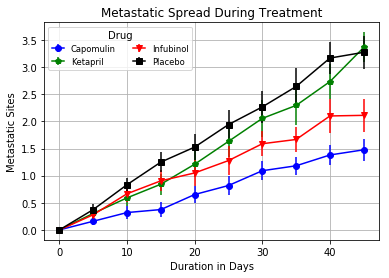

<Figure size 1224x792 with 0 Axes>

In [14]:
metastatic_fig = plt.figure()

#formatting and plotting of the lines below
plt.errorbar(x=timepoints, y=metastatic_flat_df['Capomulin'], yerr=metastatic_sem_flat_df['Capomulin'],marker ='o', color='blue', label="Capomulin")
# plt.errorbar(x=timepoints, y=metastatic_flat_df['Ceftamin'], yerr=metastatic_sem_flat_df['Ceftamin'], marker ='o', color='darkturquoise', label="Cefatmin")
plt.errorbar(x=timepoints, y=metastatic_flat_df['Ketapril'], yerr=metastatic_sem_flat_df['Ketapril'], marker ='p', color='green', label="Ketapril")
plt.errorbar(x=timepoints, y=metastatic_flat_df['Infubinol'], yerr=metastatic_sem_flat_df['Infubinol'], marker ='v', color='red', label="Infubinol")
# plt.errorbar(x=timepoints, y=metastatic_flat_df['Naftisol'], yerr=metastatic_sem_flat_df['Naftisol'], marker ='*', color='slateblue', label="Naftisol")
# plt.errorbar(x=timepoints, y=metastatic_flat_df['Propriva'], yerr=metastatic_sem_flat_df['Propriva'], marker ='x', color='magenta', label="Propriva")
# plt.errorbar(x=timepoints, y=metastatic_flat_df['Ramicane'], yerr=metastatic_sem_flat_df['Ramicane'], marker ='D', color='orange', label="Ramicane")
# plt.errorbar(x=timepoints, y=metastatic_flat_df['Stelasyn'], yerr=metastatic_sem_flat_df['Stelasyn'], marker ='^', color='purple', label="Stelasyn")
# plt.errorbar(x=timepoints, y=metastatic_flat_df['Zoniferol'], yerr=metastatic_sem_flat_df['Zoniferol'], marker ='8', color='indigo', label="Zoniferol")
plt.errorbar(x=timepoints, y=metastatic_flat_df['Placebo'], yerr=metastatic_sem_flat_df['Placebo'], marker ='s', color='black', label="Placebo")




# Legend is 2 columns wide in the top left
plt.legend(ncol=2, loc=2, handlelength=1.5, title='Drug', fontsize='small') #
plt.grid()
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Duration in Days')
plt.ylabel('Metastatic Sites')
plt.figure(figsize=(17,11))
# Save the Figure
metastatic_fig.savefig('Metastatic_Response.png', dpi=300)


## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)


# Convert to DataFrame
survival_df = response_gb['Mouse ID'].nunique()  #Gets number of mice for each drug based on Mouse ID
# Preview DataFrame
survival_df.head(12)


Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
           25           22
           30           22
           35           22
           40           21
           45           21
Ceftamin   0            25
           5            21
Name: Mouse ID, dtype: int64

In [16]:
# Minor Data Munging to Re-Format the Data Frames
survival_df = survival_df.unstack(level='Drug')
metastatic_sem_df.head()
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [17]:
survival_flat_df = survival_df
survival_flat_df.columns = survival_df.columns.get_level_values(0)
survival_flat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


In [18]:
#Add a Survival Rate column
for drug in survival_flat_df: #for loop to generate a new mice survival % column for each drug
    starting_mice = survival_flat_df[drug].max() #store the highest number of mice per study - presumably the starting number
    survival_flat_df[drug+' Survival Percentage'] = round(survival_flat_df[drug] / starting_mice, 2) * 100 # divide current mice by starting mice, multiply by 100 for percentage
survival_flat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol,Capomulin Survival Percentage,Ceftamin Survival Percentage,Infubinol Survival Percentage,Ketapril Survival Percentage,Naftisol Survival Percentage,Placebo Survival Percentage,Propriva Survival Percentage,Ramicane Survival Percentage,Stelasyn Survival Percentage,Zoniferol Survival Percentage
Timepoint,,,,,,,,,,,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,25,21,25,23,23,24,24,25,24,24,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,25,20,21,22,21,24,22,24,22,22,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,24,19,21,19,21,20,16,24,22,21,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,23,18,20,19,20,19,16,23,20,17,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0


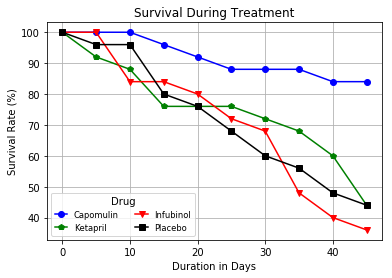

<Figure size 1224x792 with 0 Axes>

In [19]:
# Generate the Plot (Accounting for percentages)


survival_fig = plt.figure()
#unlike .errorbar, .plot does not react well to explicitly telling it what x= and y=, so we'll just put them as the first two arguments
plt.plot(timepoints, survival_flat_df['Capomulin Survival Percentage'], marker ='o', color='blue', label="Capomulin")
plt.plot(timepoints, survival_flat_df['Ketapril Survival Percentage'], marker ='p', color='green', label="Ketapril")
plt.plot(timepoints, survival_flat_df['Infubinol Survival Percentage'], marker ='v', color='red', label="Infubinol")
plt.plot(timepoints, survival_flat_df['Placebo Survival Percentage'], marker ='s', color='black', label="Placebo")


# Legend is 2 columns wide in the bottom left where it won't cover data
plt.legend(ncol=2, loc=3, handlelength=1.5, title='Drug', fontsize='small') #
plt.grid()
plt.title('Survival During Treatment')
plt.xlabel('Duration in Days')
plt.ylabel('Survival Rate (%)')
plt.figure(figsize=(17,11))
# Save the Figure
survival_fig.savefig('Subject_Survival.png', dpi=300)

# Show the Figure


## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
change_dict = {} #declare an empty dictionary.  
for x in resp_mean_flat_df:
    tumorchange = ((resp_mean_flat_df[x].iloc[-1]/resp_mean_flat_df[x].iloc[0])-1) * 100 #The <>.iloc[-1] / <>.iloc[0] divides last value by the first, to get % change.  Numbers above 1 are an increase (>100%)
    change_dict[x] = round(tumorchange, 1)    #'change_dict[x] = ' names each key after a drug.  We are also rounding to 0 decimal places here.

    # Display the data to confirm
print(change_dict)

{'Capomulin': -19.5, 'Ceftamin': 42.5, 'Infubinol': 46.1, 'Ketapril': 57.0, 'Naftisol': 53.9, 'Placebo': 51.3, 'Propriva': 47.2, 'Ramicane': -22.3, 'Stelasyn': 52.1, 'Zoniferol': 46.6}


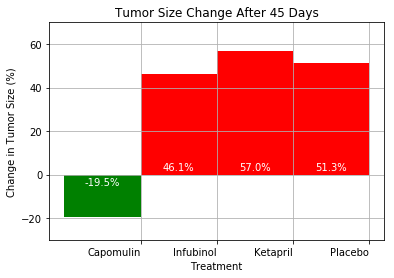

In [24]:
# Store all Relevant Percent Changes into a Tuple
target_drugs = ['Capomulin','Infubinol','Ketapril','Placebo']

#make a new dictionary with just the target drugs
studied_drug_change = {} #We could have built this data dictionary 'by handd' but this way we have a quick way to set the same thing up for other drugs
for drug in target_drugs:
    studied_drug_change[drug] = change_dict[drug]

# Splice the data between passing and failing drugs
#Drugs with a change below 0 (i.e. tumors got smaller by any percentage) are added to passing
passed_drugs = tuple([studied_drug_change[x] for x in studied_drug_change if studied_drug_change[x] < 0] )
failed_drugs = tuple([studied_drug_change[x] for x in studied_drug_change if studied_drug_change[x] >= 0])
#run the same calculation with the labels
passed_drugs_label = tuple([x for x in studied_drug_change if studied_drug_change[x] < 0])
failed_drugs_label = tuple([x for x in studied_drug_change if studied_drug_change[x] >= 0])

#they get cast to tuples because I think bar chart wants a tuple

# Orient widths. Add labels, tick marks, etc. 
bar_width = 1

response_bar_chart = plt.figure()
pass_rects = plt.bar(passed_drugs_label, passed_drugs, bar_width, color='green') #plot pass drugs first and they will be on the left
fail_rects = plt.bar(failed_drugs_label, failed_drugs, bar_width, color='red')
all_labels = tuple(passed_drugs_label + failed_drugs_label) #add these together in the order they're bar charted

x_tick_loc = np.arange(len(passed_drugs) + len(failed_drugs)) #number of xticks equal to number of drugs
plt.xticks(x_tick_loc+0.5, all_labels,horizontalalignment='right') #right aligning helps put the label under the bar - but only sort of.
lowest_y = np.min(passed_drugs) //20 * 20 #Set up the lowest number
highest_y = (np.max(failed_drugs) //20 * 20) +20 #Sets up the next 20 meter increment above the highest number
y_tick_loc = np.arange(lowest_y,highest_y+1, 20) #generate numbers from the lowest_y to the highest y(+1 because it will exclude highest_y)
plt.yticks(y_tick_loc)
plt.ylim(lowest_y-10, highest_y+10) #set the ylimits with a little extra space
#I let the xlim default in this case
plt.grid() #the gridlines are mostly determined by the xtick and ytick

plt.title('Tumor Size Change After 45 Days')
plt.xlabel('Treatment')
plt.ylabel('Change in Tumor Size (%)')

# Use functions to label the percentages of changes
def label_per(rect):
    for bar in rect:
        #plt.text creates a label on a bar
        height = bar.get_height()
        width = bar.get_width()
        x=bar.get_x() + (width/2) #Place the label halfway across the bar
        if height >= 0: #Place the label a little above the 0 axis if the drug has a positive rate
            y=2
        
        else: #place the drug a little below the 0 axis if the drug has a negative rate
            y=-5
        label = str(height) + '%' #put a % marker
        plt.text(x, y, label, color = 'white', horizontalalignment='center') #center align it!
# Call functions to implement the function calls
label_per(fail_rects)
label_per(pass_rects)
# Save the Figure
response_bar_chart.savefig('Response_Bar_Chart.png', dpi=300)